# Grouping, Visualizing, and Describing Data in Python

## 📊 Part A: Aggregating and Grouping with Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('datasets/retail_data.csv')
df.head()

,region,product_category,sales_amount,quantity_sold,month
0,East,Clothing,105.33,1,May
1,West,Home,59.94,9,Feb
2,North,Electronics,111.41,1,Mar
3,East,Electronics,118.32,3,Mar
4,East,Electronics,116.79,8,Apr


In [3]:
sales_per_region= df.groupby('region')[['sales_amount']].sum()

sales_per_region

,sales_amount
region,
East,7827.29
North,7862.64
South,6916.63
West,8583.18


In [4]:
sales_per_month= df.groupby('month')['sales_amount'].sum()
sales_per_month

month
Apr    4411.59
Feb    4801.83
Jan    5247.66
Jun    5128.46
Mar    5301.25
May    6298.95
Name: sales_amount, dtype: float64

In [5]:
product_sold_per_category= df.groupby('product_category')['quantity_sold'].count()

product_sold_per_category

product_category
Books          54
Clothing       82
Electronics    87
Home           77
Name: quantity_sold, dtype: int64

In [6]:
detailed_summary= df.groupby(['product_category','region'])[['sales_amount']].sum()

detailed_summary

sales_amount
product_category region              
Books            East          963.21
                 North        1121.29
                 South        1187.80
                 West         2022.89
Clothing         East         2040.18
                 North        2273.95
                 South        1688.35
                 West         2368.17
Electronics      East         2617.60
                 North        1976.14
                 South        2074.23
                 West         2549.34
Home             East         2206.30
                 North        2491.26
                 South        1966.25
                 West         1642.78

In [7]:
region_summary = df.groupby('region')['sales_amount'].agg(['sum','mean','count','min','max'])
region_summary

,sum,mean,count,min,max
region,,,,,
East,7827.29,101.653117,77,34.04,175.81
North,7862.64,106.251892,74,49.94,173.66
South,6916.63,101.715147,68,43.31,168.97
West,8583.18,105.965185,81,14.54,164.90


##### Custom Aggregations

In [8]:
def sales_range(x):
    return x.max() - x.min()

In [9]:
custom_aggregation= df.groupby('region')['sales_amount'].agg(['sum','mean', sales_range]).reset_index()

custom_aggregation

,region,sum,mean,sales_range
0,East,7827.29,101.653117,141.77
1,North,7862.64,106.251892,123.72
2,South,6916.63,101.715147,125.66
3,West,8583.18,105.965185,150.36


### Pivot Tables: Your Data's Best Friend

In [10]:
pivot_sales= df.pivot_table(
    values='sales_amount',
    index= 'region',
    columns='product_category',
    aggfunc='sum',
    fill_value=0
)

pivot_sales

product_category,Books,Clothing,Electronics,Home
region,,,,
East,963.21,2040.18,2617.60,2206.30
North,1121.29,2273.95,1976.14,2491.26
South,1187.80,1688.35,2074.23,1966.25
West,2022.89,2368.17,2549.34,1642.78


In [11]:
quantity_sold_pivot= df.pivot_table(
    values='quantity_sold',
    index= 'region',
    columns='product_category',
    aggfunc='count',
    fill_value=0
)

quantity_sold_pivot.loc['Total']= quantity_sold_pivot.sum()
quantity_sold_pivot

product_category,Books,Clothing,Electronics,Home
region,,,,
East,11,22,24,20
North,11,23,18,22
South,13,16,21,18
West,19,21,24,17
Total,54,82,87,77


#### 🏆 Ranking and Sorting

In [12]:
# Top Regions per Sales

top_regions= df.groupby('region')['sales_amount'].sum().sort_values(ascending=False)

top_regions

region
West     8583.18
North    7862.64
East     7827.29
South    6916.63
Name: sales_amount, dtype: float64

In [13]:
# Top Categories by Sales
top_categories=  df.groupby('product_category')['sales_amount'].sum().sort_values(ascending=False)
top_categories

product_category
Electronics    9217.31
Clothing       8370.65
Home           8306.59
Books          5295.19
Name: sales_amount, dtype: float64

In [14]:
# Top 3 categories by average sales

top_3_months_by_sales= df.groupby('month')['sales_amount'].sum().nlargest(3)

top_3_months_by_sales

month
May    6298.95
Mar    5301.25
Jan    5247.66
Name: sales_amount, dtype: float64

#### Practice Exercises - Part A

## 📈 Part B: Visualizing Data with Matplotlib & Seaborn

### Line Plots: Perfect for Trends Over Time

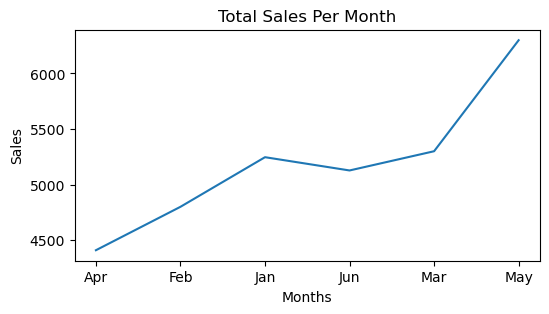

In [15]:
sales_per_month= df.groupby('month')['sales_amount'].sum()

#Chart Size
plt.figure(figsize= (6,3))

plt.plot(sales_per_month.index,sales_per_month.values)
plt.title("Total Sales Per Month")  # Add chart title
plt.xlabel("Months")  # Add X Axis label
plt.ylabel("Sales")
plt.show() # show the chart

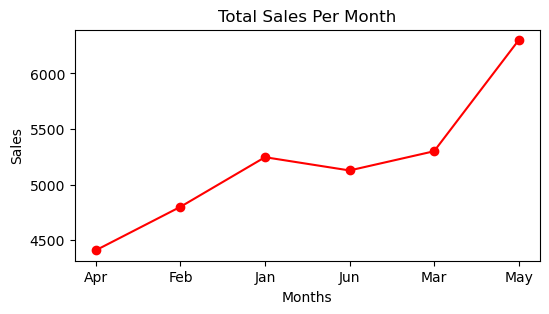

In [18]:
sales_per_month= df.groupby('month')['sales_amount'].sum()

#Chart Size
plt.figure(figsize= (6,3))

plt.plot(sales_per_month.index,sales_per_month.values,marker='o',color='red')
plt.title("Total Sales Per Month")  # Add chart title
plt.xlabel("Months")  # Add X Axis label
plt.ylabel("Sales")
plt.show() # show the chart

### Bar Charts: Compare Categories

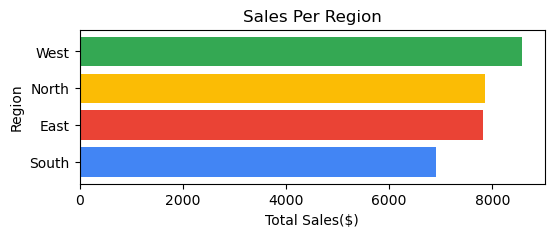

In [20]:
sales_per_region= df.groupby('region')['sales_amount'].sum().sort_values(ascending=True)

plt.figure(figsize=(6,2))

plt.barh(sales_per_region.index,sales_per_region.values,color=['#4285f4','#ea4335','#fbbc05','#34a853'])
plt.title("Sales Per Region")
plt.xlabel('Total Sales($)')
plt.ylabel('Region')
plt.show()

### Pie Charts

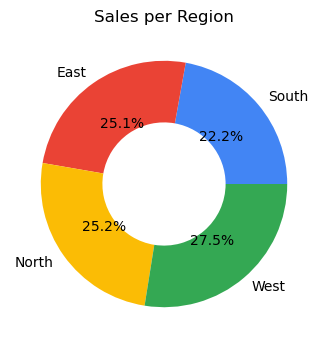

In [47]:
plt.figure(figsize=(4,4))    
plt.pie(
    sales_per_region,
    labels= sales_per_region.index, 
    autopct='%1.1f%%',
    colors=['#4285f4','#ea4335','#fbbc05','#34a853'],
    wedgeprops={'width': 0.5}
)

plt.title("Sales per Region")
plt.show()

In [26]:
df.head()

,region,product_category,sales_amount,quantity_sold,month
0,East,Clothing,105.33,1,May
1,West,Home,59.94,9,Feb
2,North,Electronics,111.41,1,Mar
3,East,Electronics,118.32,3,Mar
4,East,Electronics,116.79,8,Apr


C:\Users\USER\AppData\Local\Temp\ipykernel_1924\1295202975.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='product_category',palette='viridis')


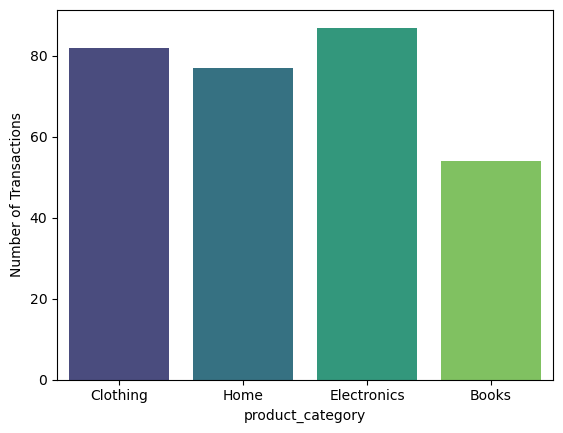

In [38]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='product_category',palette='viridis')
plt.ylabel("Number of Transactions")
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_1924\1771822314.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='region', y='sales_amount', palette='Set2')


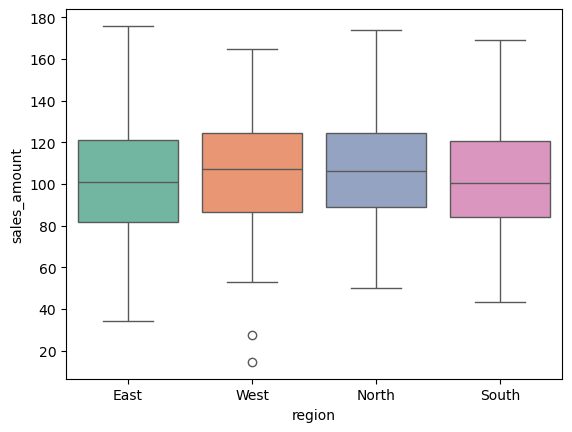

In [39]:
#Box Plot

sns.boxplot(data=df, x='region', y='sales_amount', palette='Set2')
plt.show()

### Histograms: Show Data Distribution

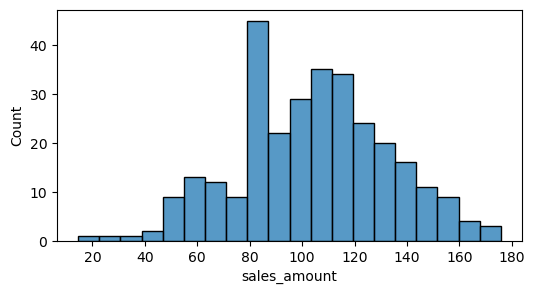

In [43]:
plt.figure(figsize=(6,3))
sns.histplot(data=df, x='sales_amount', bins=20)

plt.show()